<a href="https://colab.research.google.com/github/martinjm81/pythonprojects/blob/statistics/martin(2025)_tabla_freq1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
#caso datos csv
#opcion 1: data local CSV
uploaded = files.upload()
filename = next(iter(uploaded))

#opción 2: IEL Data www.institutoeconometria.com
filename = 'https://raw.githubusercontent.com/institutoeconometrialima/IELData/refs/heads/main/encuesta.csv'


In [9]:
#verificación
df = pd.read_csv(filename) #caso csv
#df = pd.read_excel(filename)  #caso excel
#df = pd.read_excel(filename, sheet_name=hoja)  #caso excel eligiendo hoja
datos = df.dropna()
display(datos)

,N°,¿Cuánto le gusta el producto? (Del 1 al 5),¿Cuánto pagaría Ud por el producto?,¿Cuántas veces al mes consumiría el producto?
0,1,3,31,4
1,2,4,39,4
2,3,2,50,4
3,4,4,37,4
4,5,3,41,4
...,...,...,...,...
380,381,2,22,3
381,382,1,20,3
382,383,4,73,4
383,384,2,45,3


In [13]:
#caso de muchas variables
ver_vars = input("¿Deseas ver las variables? (s/n): ").lower()
if ver_vars == "s":
    print("\nVariables del archivo:")
    print(df.columns.tolist())

var = input("\nIngresa el nombre de la variable que quieres analizar: ")

es_cualitativa = df[var].dtype == 'object'

datos = df[var].dropna()

¿Deseas ver las variables? (s/n): si

Ingresa el nombre de la variable que quieres analizar: ¿Cuánto pagaría Ud por el producto?


In [28]:
#creación de las tablas
tabla = datos.value_counts().sort_index().to_frame(name='fi')

# Calcular frecuencias
tabla['Fi'] = tabla['fi'].cumsum()
tabla['hi'] = tabla['fi'] / tabla['fi'].sum()
tabla['Hi'] = tabla['hi'].cumsum()
tabla['pi'] = tabla['hi'] * 100
tabla['Pi'] = tabla['pi'].cumsum()

# Fila total
total_row = pd.DataFrame({
    'fi': [tabla['fi'].sum()],
    'Fi': [''],
    'hi': [tabla['hi'].sum()],
    'Hi': [''],
    'pi': [tabla['pi'].sum()],
    'Pi': ['']
}, index=['Total'])

tabla = pd.concat([tabla, total_row])
tabla.to_excel("tabla_frecuencias.xlsx", index=True)

# Mostrar tabla
print("\nTabla de distribución de frecuencias:")
print(tabla)
files.download("tabla_frecuencias.xlsx")


Tabla de distribución de frecuencias:
        fi   Fi        hi        Hi          pi         Pi
20       7    7  0.018182  0.018182    1.818182   1.818182
21       6   13  0.015584  0.033766    1.558442   3.376623
22      10   23  0.025974   0.05974    2.597403   5.974026
23       9   32  0.023377  0.083117    2.337662   8.311688
24       6   38  0.015584  0.098701    1.558442    9.87013
...    ...  ...       ...       ...         ...        ...
77       4  366  0.010390  0.950649    1.038961  95.064935
78       8  374  0.020779  0.971429    2.077922  97.142857
79       7  381  0.018182   0.98961    1.818182  98.961039
80       4  385  0.010390       1.0    1.038961      100.0
Total  385       1.000000            100.000000           

[62 rows x 6 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

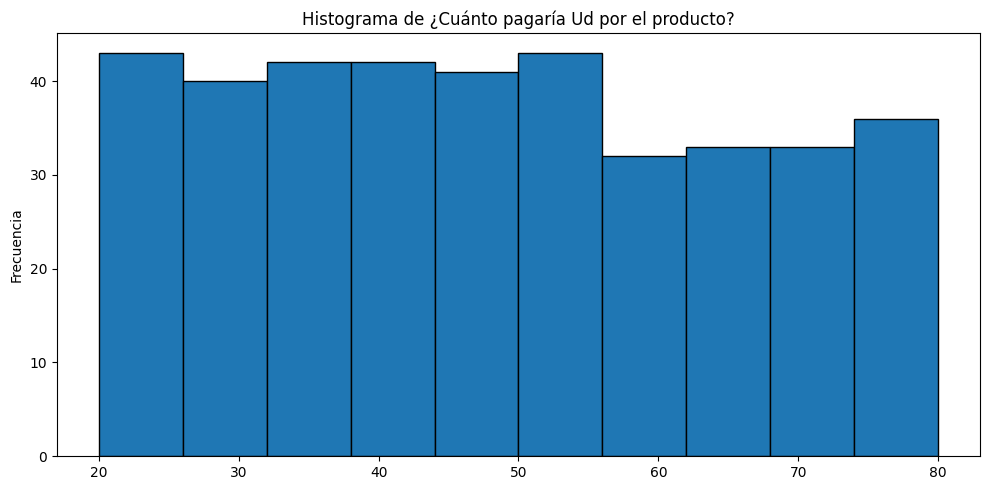

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Histograma
es_cualitativa = df[var].dtype == 'object'

plt.figure(figsize=(10, 5))
if es_cualitativa:
    plt.bar(tabla.index[:-1], tabla['fi'][:-1])
    plt.title(f"Histograma de {var}")
    plt.xticks(rotation=45, ha='right', fontsize=8)
else:
    plt.hist(datos, bins='sturges', edgecolor='black')
    plt.title(f"Histograma de {var}")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("histograma_variable.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("histograma_variable.png")
